<div style="background-color: #8e7cc3; padding: 7px; text-align: center;">
    <h2>Projeto Machine Learning II | Algoritmos de SMV, Ensemble e K-means</h2>
</div>

##### **Alunos:** Matheus Mendonça e Tainah Guerra

## Sumário

1. Introdução

    1.1 Objetivo

    1.2 Dados
    
2. Importando Bibliotecas
3. Análise Exploratória dos Dados

    3.1 Análise Inicial

    3.2 Avaliando Correlações

    3.3 Gráficos
     
4. Modelos Supervisionados

    4.1 Pré-processamento

    4.2 SMV (Support vector machine)

    4.3 Ensemble

6. Modelo Não-Supervisionado

    6.1 Pré-processamento

    6.2 K-means

7. Conclusões

## 1. Introdução

### **Objetivo:** 

Em universidades ao redor do mundo, a taxa de desistência de cursos superiores é um fator a ser proximamente analisado e combatido para garantir altos níveis de educação na população. Levantamos a hipótese de que diferentes variáveis sociais, econômicas e demográficas afetam a permanência ou desistência de estudantes de cursos superiores. 

Para avaliar essa relação, criamos modelos de machine learning de aprendizado supervisionado para prever, com base nessas variáveis, se um estudante é desistente, matriculado ou graduado em um curso. 

Ainda, utilizamos modelos de aprendizado não supervisionado para identificar padrões e segmentações dentro dos dados dos estudantes, sem considerar previamente o desfecho de desistência. Esses modelos permitem descobrir agrupamentos naturais e características comuns entre grupos de estudantes, fornecendo insights adicionais sobre os fatores que influenciam a desistência.



### **Dados:** 

Utilizamos nesse projeto um conjunto de dados do Kaggle, encontrado [aqui](https://www.kaggle.com/datasets/thedevastator/higher-education-predictors-of-student-retention). Esse foi criado a partir de pesquisa de uma instituição de ensino superior (adquirido de várias bases de dados distintas), relacionado a estudantes matriculados em diferentes cursos de graduação, como agronomia, design, educação, enfermagem, jornalismo, gestão, serviço social e tecnologias.


##### **Abaixo, a descrição das variáveis que utilizamos na versão final do dataset:** 

| Coluna                    | Tipo de Dado | Descrição                        | 
|---------------------------|--------------|----------------------------------|
| Application mode | Categórico | Método de inscrição utilizado pelo aluno | 
| Displaced | Categórico | Se o aluno é uma pessoa deslocada | 
| Debtor | Categórico | Se o aluno é devedor | 
| Tuition fees up to date | Categórico | Se as mensalidades do aluno estão em dia | 
| Gender | Categórico | Gênero do aluno | 
| Scholarship holder | Categórico | Se o aluno é bolsista | 
| Age at enrollment | Numérico | Idado do aluno na matrícula |  
| Curricular units 2nd sem (enrolled) | Numérico | Número de unidades curriculares matriculadas pelo estudante no segundo semestre | 
| Curricular units 2nd sem (approved) | Numérico | Número de unidades curriculares avaliadas pelo estudante no primeiro semestre | 
| Curricular units 2nd sem (grade) | Numérico | Número de unidades curriculares aprovadas pelo estudante no primeiro semestre | 
| Target | Categórico | Se o aluno é "desistente", "matriculado" ou "graduado" | 

## 2. Importando Bibliotecas

In [242]:
# Manipulação e Visualização dos dados

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Pré-processamento

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

# Modelagem e Otimização

from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA


# Métricas de Avaliação

from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, 
                             ConfusionMatrixDisplay, roc_auc_score, classification_report, silhouette_score)

## 3. Análise Exploratória dos Dados

### 3.1 Análise Inicial

In [243]:
df_raw = pd.read_csv(r'..\data\dataset.csv')
df_raw.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [244]:
# Informações gerais do dataset

df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 35 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Nacionality                                     4424 non-null   int64  
 7   Mother's qualification                          4424 non-null   int64  
 8   Father's qualification                          4424 non-null   int64  
 9   Mother's occupation                      

In [245]:
# Checando valores nulos

print(f'Total de registros nulos:\n{df_raw.isnull().sum()}')

Total de registros nulos:
Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance                        0
Previous qualification                            0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrollment                                 0
International                         

In [246]:
# Checando registros duplicados

print(f'Total de registros duplicados: {df_raw.duplicated().sum()}')

Total de registros duplicados: 0


In [247]:
# Descrição estatística geral dos dados numéricos

colunas_numericas = ['Age at enrollment', 'Application order', 'Curricular units 1st sem (credited)', 'Curricular units 1st sem (enrolled)', 
                     'Curricular units 1st sem (evaluations)', 'Curricular units 1st sem (approved)', 'Curricular units 1st sem (grade)', 
                     'Curricular units 1st sem (without evaluations)', 'Curricular units 2nd sem (credited)', 'Curricular units 2nd sem (enrolled)',
                     'Curricular units 2nd sem (evaluations)', 'Curricular units 2nd sem (approved)', 'Curricular units 2nd sem (grade)', 
                     'Curricular units 2nd sem (without evaluations)', 'Unemployment rate', 'Inflation rate', 'GDP']

df_raw[colunas_numericas].describe().round(2)

,Age at enrollment,Application order,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,4424.00,4424.00,4424.00,4424.00,4424.00,4424.00,4424.00,4424.00,4424.00,4424.00,4424.00,4424.00,4424.00,4424.00,4424.00,4424.00,4424.00
mean,23.27,1.73,0.71,6.27,8.30,4.71,10.64,0.14,0.54,6.23,8.06,4.44,10.23,0.15,11.57,1.23,0.00
std,7.59,1.31,2.36,2.48,4.18,3.09,4.84,0.69,1.92,2.20,3.95,3.01,5.21,0.75,2.66,1.38,2.27
min,17.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,7.60,-0.80,-4.06
25%,19.00,1.00,0.00,5.00,6.00,3.00,11.00,0.00,0.00,5.00,6.00,2.00,10.75,0.00,9.40,0.30,-1.70
50%,20.00,1.00,0.00,6.00,8.00,5.00,12.29,0.00,0.00,6.00,8.00,5.00,12.20,0.00,11.10,1.40,0.32
75%,25.00,2.00,0.00,7.00,10.00,6.00,13.40,0.00,0.00,7.00,10.00,6.00,13.33,0.00,13.90,2.60,1.79
max,70.00,9.00,20.00,26.00,45.00,26.00,18.88,12.00,19.00,23.00,33.00,20.00,18.57,12.00,16.20,3.70,3.51


### 3.2 Avaliando Correlações

#### Correlações Features-Target

Para o cálculo dos índices de correlação entre as variáveis (features) e o alvo (target), devemos converter o último em valores numéricos.

In [248]:
# Conversão do Target para valores numéricos

df_raw['Target'] = df_raw['Target'].map({
    'Dropout':0,
    'Enrolled':1,
    'Graduate':2
})

In [249]:
# Cálculo do índice de correlação de Pearson entre Features e Target

correlacoes = df_raw.corr()['Target']
correlacoes

Marital status                                   -0.089804
Application mode                                 -0.212025
Application order                                 0.089791
Course                                            0.007841
Daytime/evening attendance                        0.075107
Previous qualification                           -0.091365
Nacionality                                      -0.004740
Mother's qualification                           -0.038346
Father's qualification                            0.000329
Mother's occupation                               0.048424
Father's occupation                               0.051702
Displaced                                         0.113986
Educational special needs                        -0.007353
Debtor                                           -0.240999
Tuition fees up to date                           0.409827
Gender                                           -0.229270
Scholarship holder                                0.2975

As features que apresentam maior correlação com o target são geralmente mais importantes para a precisão dos modelos supervisionados. Para selecionar as variáveis mais relevantes, definimos um limiar absoluto de 0,1 para a correlação. Assim, utilizaremos apenas as variáveis cuja correlação, em valor absoluto, seja maior ou igual a 0.1.

In [250]:
# Filtrando colunas com valores absolutos menores que 0.1

colunas_drop = []

for coluna in correlacoes.index:
    if abs(correlacoes[coluna]) < 0.1 and coluna != 'Target':
        colunas_drop.append(coluna)

In [251]:
# Removendo colunas filtradas

df = df_raw.drop(columns=colunas_drop)
df.head()

,Application mode,Displaced,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,Curricular units 1st sem (enrolled),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Target
0,8,1,0,1,1,0,20,0,0,0.000000,0,0,0.000000,0
1,6,1,0,0,1,0,19,6,6,14.000000,6,6,13.666667,2
2,1,1,0,0,1,0,19,6,0,0.000000,6,0,0.000000,0
3,8,1,0,1,0,0,20,6,6,13.428571,6,5,12.400000,2
4,12,0,0,1,0,0,45,6,5,12.333333,6,6,13.000000,2


#### Correlações Features-Features

Além disso, é recomendável que as variáveis utilizadas não tenham alta correlação entre si, pois isso pode indicar informação redundante e aumentar o risco de overfitting e vieses. Vamos checar as índices de correleação entre as variáveis.

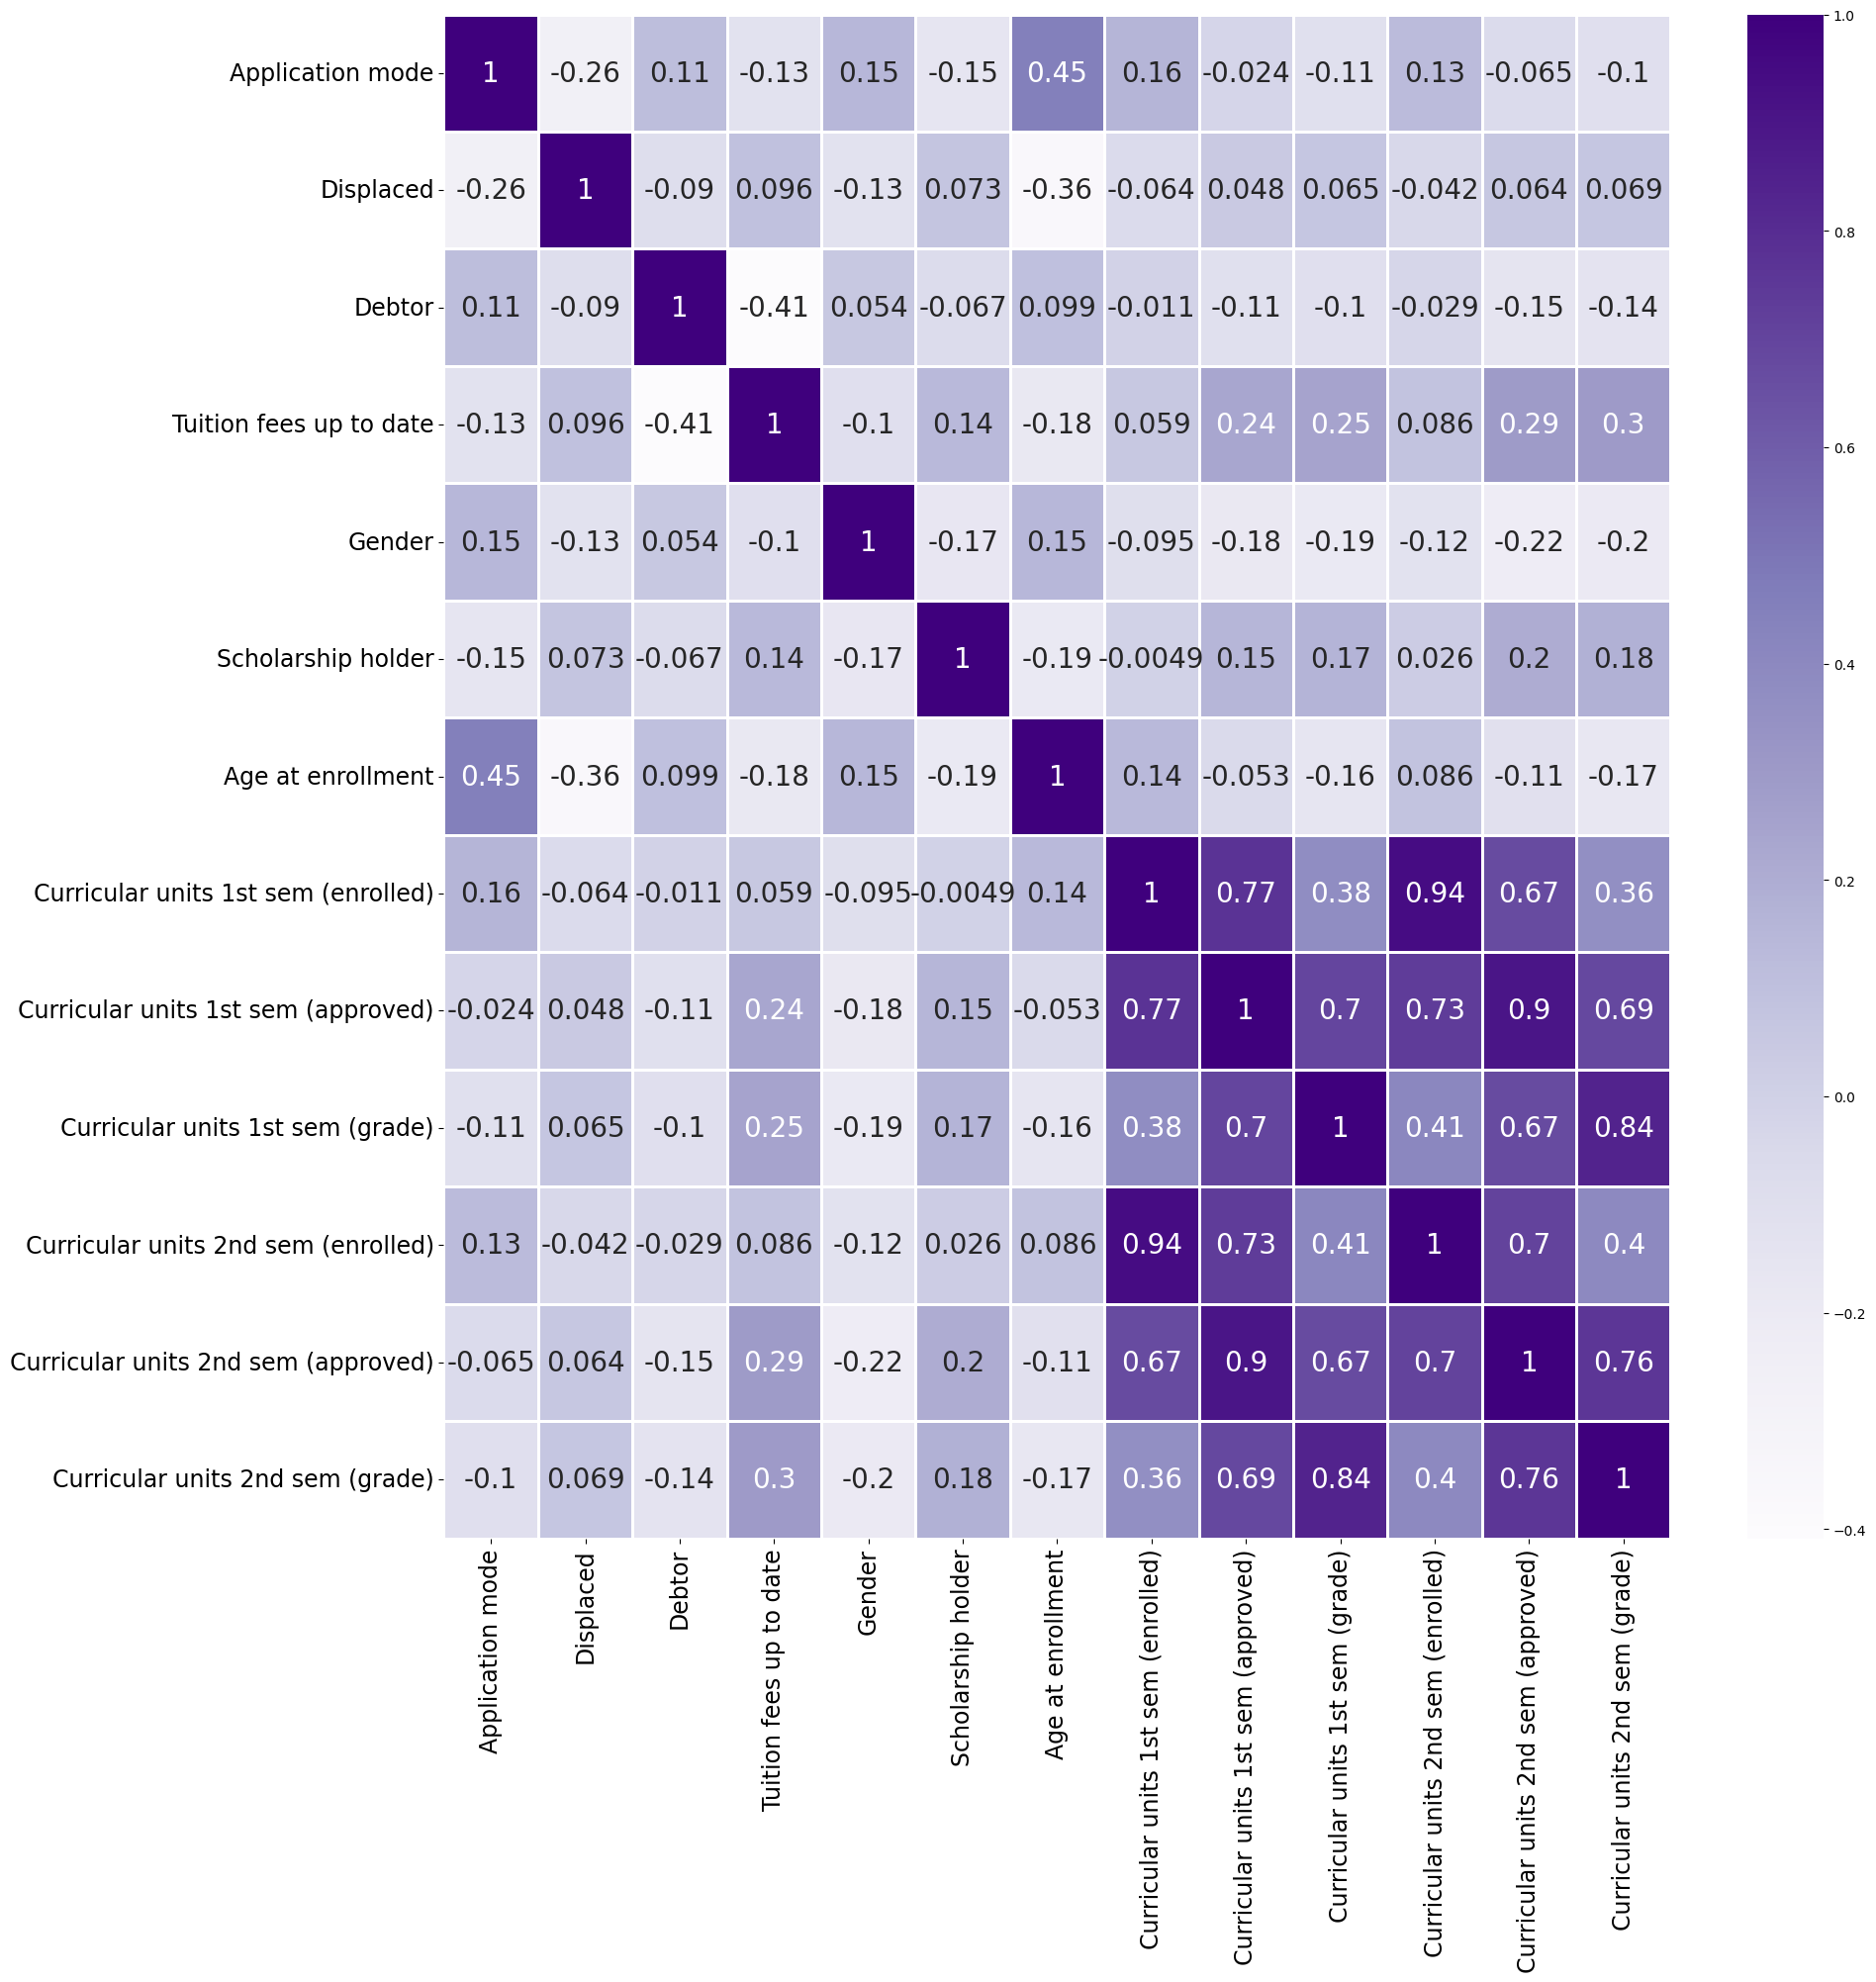

In [252]:
# Chegando índice de correlação de Pearson entre as variáveis selecionadas utilizando heatmap

plt.figure(figsize=(20, 20))

sns.heatmap(
    df.drop(columns='Target').corr(),
    annot=True,
    cmap='Purples',
    linewidths=0.9,
    annot_kws={"size": 20} 
)
plt.xticks(fontsize=17) 
plt.yticks(fontsize=17)

plt.show()

Vemos altos índices de correlação entre as unidades curriculares de mesma categoria (matriculadas, avaliadas ou aprovadas) para o primeiro e segundo semestre, o que faz sentido. Como essas informações parecem estar redundantes, removemos as variáveis com menor correlação com o target. Nesse caso, todas categorias de unidades curriculares do primeiro semestre.

In [253]:
# Remoção de variáveis redundantes

df_final = df.drop(columns=['Curricular units 1st sem (enrolled)','Curricular units 1st sem (approved)', 'Curricular units 1st sem (grade)'])
df_final.head()

,Application mode,Displaced,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,Curricular units 2nd sem (enrolled),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Target
0,8,1,0,1,1,0,20,0,0,0.000000,0
1,6,1,0,0,1,0,19,6,6,13.666667,2
2,1,1,0,0,1,0,19,6,0,0.000000,0
3,8,1,0,1,0,0,20,6,5,12.400000,2
4,12,0,0,1,0,0,45,6,6,13.000000,2


### 3.3 Gráficos

#### Visualizando features numéricas

In [254]:
# Criando função para plotar histograma e boxplot

def plot_histogram_and_boxplot(data, feature):
    plt.figure(figsize=(13,6))
    
    plt.subplot(1,2,1)
    sns.histplot(data=data, x=feature, hue="Target", palette="Purples")
    plt.title(f'Histograma de {feature}')

    plt.subplot(1,2,2)
    sns.boxplot(data=data, x="Target", y=feature, hue="Target", palette="Purples", dodge=False, legend=False)
    plt.title(f'Boxplot de {feature} por Target')
    
    plt.show()


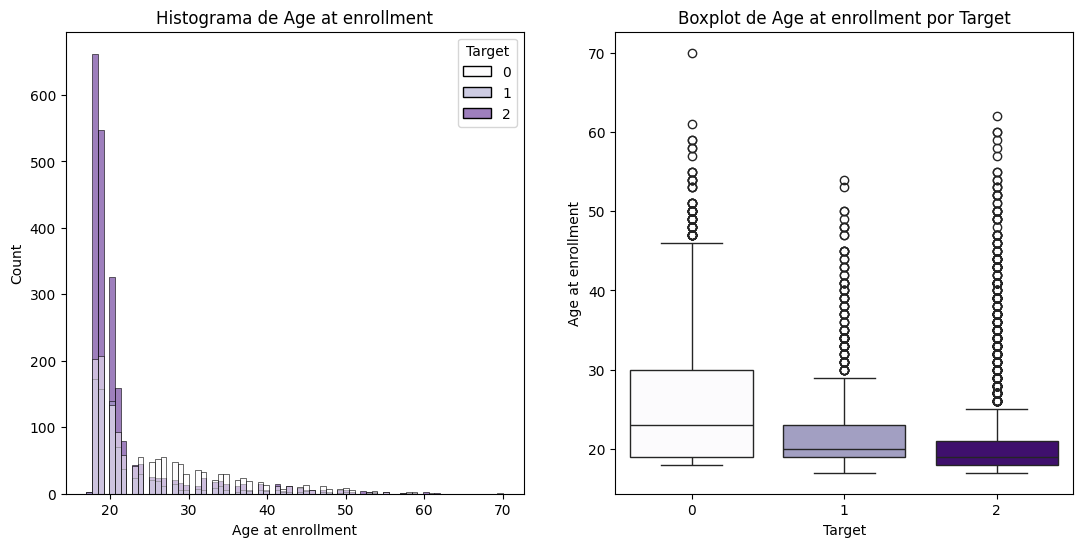

In [255]:
plot_histogram_and_boxplot(data=df_final, feature='Age at enrollment')

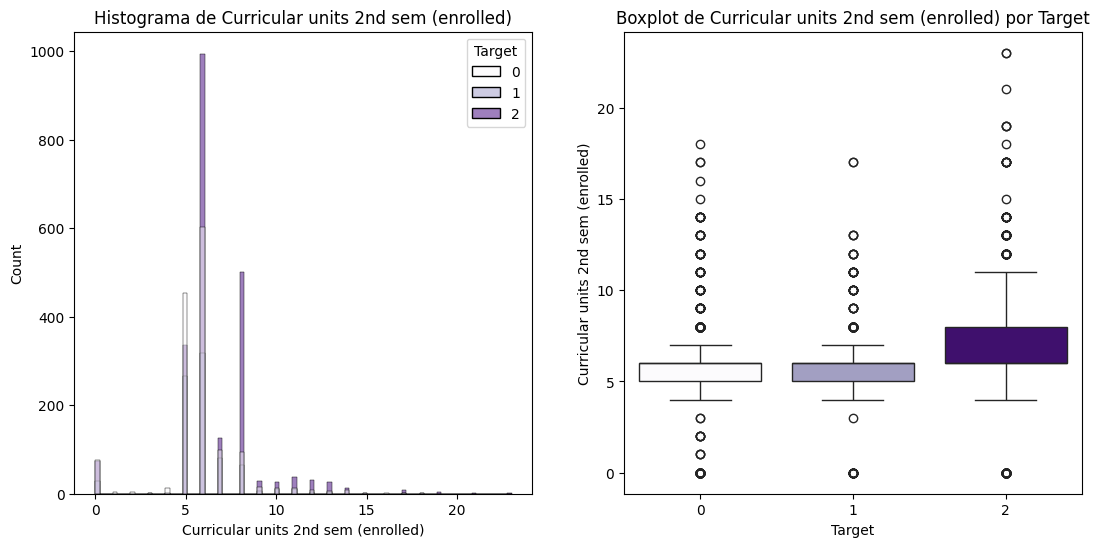

In [256]:
plot_histogram_and_boxplot(data=df_final, feature='Curricular units 2nd sem (enrolled)')

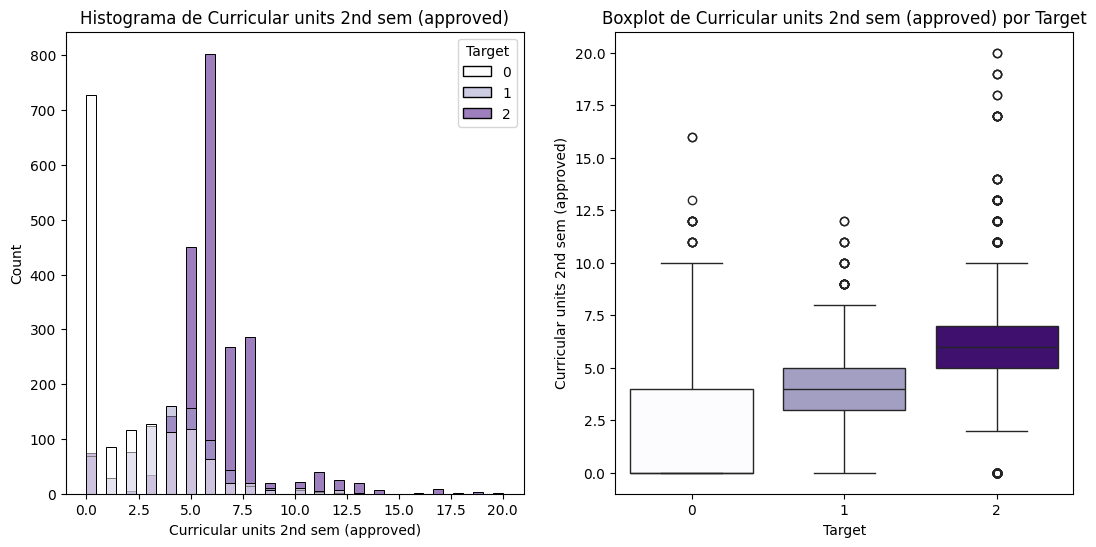

In [257]:
plot_histogram_and_boxplot(data=df_final, feature='Curricular units 2nd sem (approved)')

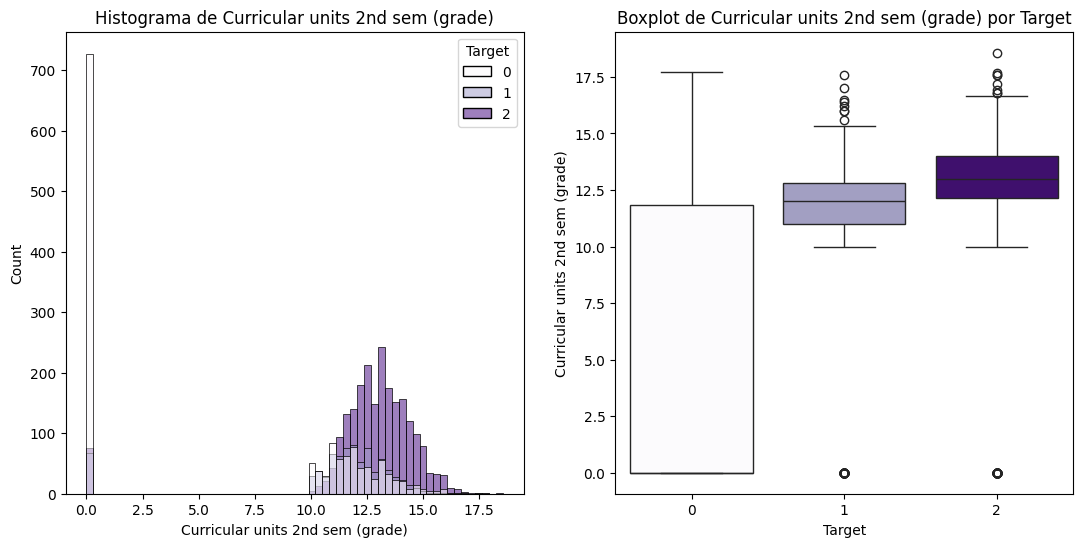

In [258]:
plot_histogram_and_boxplot(data=df_final, feature='Curricular units 2nd sem (grade)')

#### Visualizando features categóricas

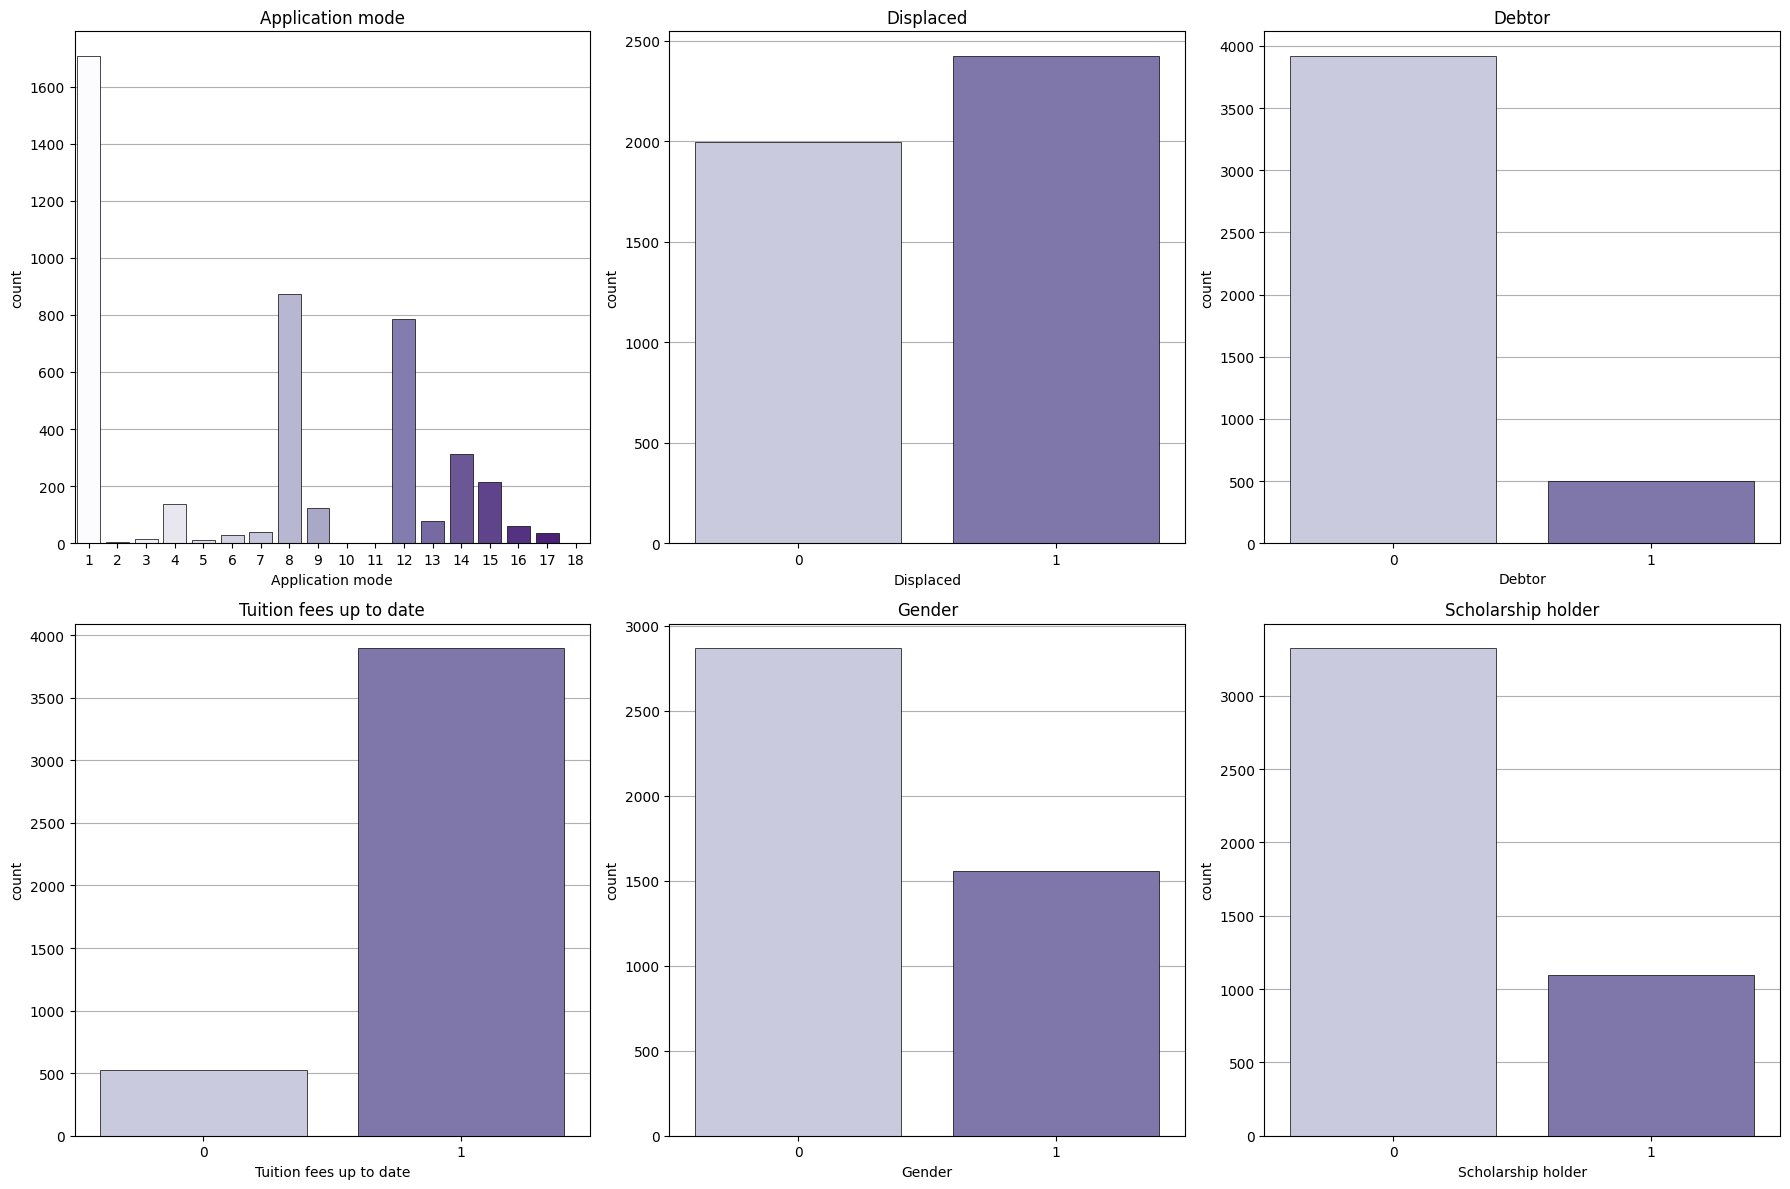

In [259]:
# Visualizando frequências das features categóricas

features_cat = ['Application mode', 'Displaced', 'Debtor', 'Tuition fees up to date', 'Gender', 'Scholarship holder']

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 12))

for feature, ax in zip(features_cat, axes.flatten()):
    sns.countplot(data=df_final, x=feature, hue=feature, palette="Purples", linewidth=0.5, edgecolor='black', ax=ax)
    ax.set_title(f'{feature}')
    ax.legend_.remove()
    ax.yaxis.grid(True)  
    ax.set_axisbelow(True)  

plt.tight_layout()
plt.show()


#### Visualizando target

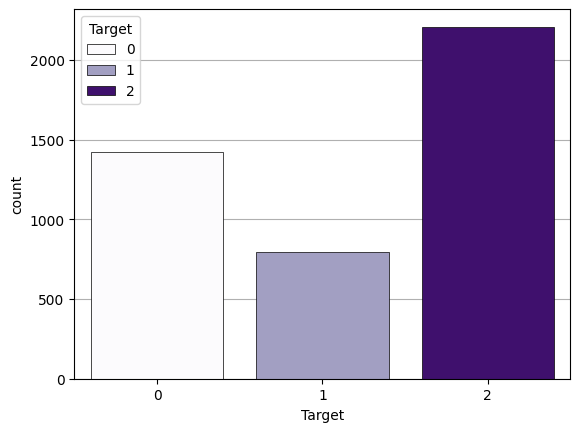

In [260]:
ax = sns.countplot(data=df_final, x='Target', hue='Target', palette="Purples", linewidth=0.5, edgecolor='black')
ax.yaxis.grid(True)  
ax.set_axisbelow(True)  

plt.show()

A distribuição de frequências no target sugerem desequilíbrio moderado entre as classes, o que pode comprometer a performance dos algoritmos de machine learning.

## 4. Modelos Supervisionados

### 4.1 Pré-processamento

O pré-processamento visa ajustar os dados para funcionamento ideal dos algoritmos. Aqui, normalizamos os dados numéricos com StandardScaler, convertemos as features categóricas em numéricas aplicando o OneHotEncoder, e separamos o dataset em treino e teste.

In [261]:
colunas_categoricas = ['Application mode', 'Displaced', 'Debtor', 'Tuition fees up to date',
                       'Gender', 'Scholarship holder']

colunas_numericas = ['Age at enrollment', 'Curricular units 2nd sem (enrolled)',
                      'Curricular units 2nd sem (approved)', 'Curricular units 2nd sem (grade)']

In [262]:
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler()) 
])

In [263]:
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  
    ('onehot', OneHotEncoder(handle_unknown='ignore'))     
])

In [264]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, colunas_numericas),
        ('cat', categorical_transformer, colunas_categoricas)
    ])


In [265]:
dados_refinados = df_final.copy()

In [266]:
# Separando dataset em target e features

X = dados_refinados.drop('Target', axis=1)
y = dados_refinados['Target']

In [267]:
# Split do dataset em treino e teste

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

X_train_preparado = preprocessor.fit_transform(X_train)
X_test_preparado = preprocessor.transform(X_test)

print(X_train_preparado.shape, X_test_preparado.shape)

(3539, 31) (885, 31)


### 4.2 SVM (Support vector machine)

In [268]:
svm_parametros_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear']
}

svm_grid_search = GridSearchCV(SVC(random_state=0), svm_parametros_grid, cv=3, scoring='accuracy')
svm_grid_search.fit(X_train_preparado, y_train)

svm_params = svm_grid_search.best_params_
svm_score = svm_grid_search.best_score_

In [269]:
svm_model = SVC(C=svm_params['C'], kernel=svm_params['kernel'])

svm_model.fit(X_train_preparado, y_train)

svm_train_predictions = svm_model.predict(X_train_preparado)
svm_test_predictions = svm_model.predict(X_test_preparado)

#### Métricas de avaliação

In [293]:
# Métricas do treino
svm_train_accuracy = accuracy_score(y_train, svm_train_predictions)
svm_train_precision = precision_score(y_train, svm_train_predictions, average='weighted')
svm_train_recall = recall_score(y_train, svm_train_predictions, average='weighted')
svm_train_f1 = f1_score(y_train, svm_train_predictions, average='weighted')

# Métricas do teste
svm_test_accuracy = accuracy_score(y_test, svm_test_predictions)
svm_test_precision = precision_score(y_test, svm_test_predictions, average='weighted')
svm_test_recall = recall_score(y_test, svm_test_predictions, average='weighted')
svm_test_f1 = f1_score(y_test, svm_test_predictions, average='weighted')

# Criando um DataFrame para comparar as métricas de treino e teste
metrics_svm_comp = pd.DataFrame({
    'Accuracy': [round(svm_train_accuracy, 4), round(svm_test_accuracy, 4)],
    'Precision': [round(svm_train_precision, 4), round(svm_test_precision, 4)],
    'Recall': [round(svm_train_recall, 4), round(svm_test_recall, 4)],
    'F1': [round(svm_train_f1, 4), round(svm_test_f1, 4)]
}, index=['Treino', 'Teste'])

metrics_svm_comp

,Accuracy,Precision,Recall,F1
Treino,0.7530,0.7479,0.7530,0.7395
Teste,0.7514,0.7451,0.7514,0.7393


Tanto no treino quanto no teste, o modelo de svm alcançou valores muito próximos em todas as métricas, demonstrando um bom desempenho geral do algoritmo.

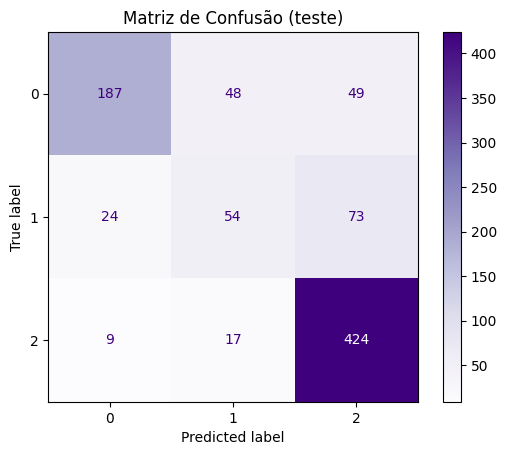

In [271]:
svm_conf_matrix = confusion_matrix(y_test, svm_test_predictions)

matrix_conf = ConfusionMatrixDisplay(svm_conf_matrix)
matrix_conf.plot(cmap='Purples')  

plt.title('Matriz de Confusão (teste)')
plt.show()

In [272]:
svm_classification_report = classification_report(y_test, svm_test_predictions)
print(f'Relatório de Classificação para a SVM (teste):\n\n{svm_classification_report}')

Relatório de Classificação para a SVM (teste):

              precision    recall  f1-score   support

           0       0.85      0.66      0.74       284
           1       0.45      0.36      0.40       151
           2       0.78      0.94      0.85       450

    accuracy                           0.75       885
   macro avg       0.69      0.65      0.66       885
weighted avg       0.75      0.75      0.74       885



### 4.3 Random Forest (Ensemble)

In [ ]:
rf_parametros_grid = {
    'n_estimators': [100,200,300],
    'max_features': ['auto', 'sqrt']
}

rf_grid_search = GridSearchCV(RandomForestClassifier(random_state=0), rf_parametros_grid, cv=3, scoring='accuracy')
rf_grid_search.fit(X_train_preparado, y_train)

rf_params = rf_grid_search.best_params_
rf_score = rf_grid_search.best_score_

In [274]:
print(f"Melhores parâmetros para RF: {rf_params}")

Melhores parâmetros para RF: {'max_features': 'sqrt', 'n_estimators': 300}


In [275]:
rf_model = RandomForestClassifier(
    n_estimators=rf_params['n_estimators'],
    max_features=rf_params['max_features'],
    random_state=0
)

rf_model.fit(X_train_preparado, y_train)

rf_train_predictions = rf_model.predict(X_train_preparado)
rf_test_predictions = rf_model.predict(X_test_preparado)

#### Métricas de avaliação

In [292]:
# Métricas do treino
rf_train_accuracy = accuracy_score(y_train, rf_train_predictions)
rf_train_precision = precision_score(y_train, rf_train_predictions, average='weighted')
rf_train_recall = recall_score(y_train, rf_train_predictions, average='weighted')
rf_train_f1 = f1_score(y_train, rf_train_predictions, average='weighted')

# Métricas do teste
rf_test_accuracy = accuracy_score(y_test, rf_test_predictions)
rf_test_precision = precision_score(y_test, rf_test_predictions, average='weighted')
rf_test_recall = recall_score(y_test, rf_test_predictions, average='weighted')
rf_test_f1 = f1_score(y_test, rf_test_predictions, average='weighted')

# Criando um DataFrame para comparar as métricas de treino e teste
metrics_rf_comp = pd.DataFrame({
    'Accuracy': [round(rf_train_accuracy, 4), round(rf_test_accuracy, 4)],
    'Precision': [round(rf_train_precision, 4), round(rf_test_precision, 4)],
    'Recall': [round(rf_train_recall, 4), round(rf_test_recall, 4)],
    'F1': [round(rf_train_f1, 4), round(rf_test_f1, 4)]
}, index=['Treino', 'Teste'])

metrics_rf_comp

,Accuracy,Precision,Recall,F1
Treino,0.9788,0.9789,0.9788,0.9788
Teste,0.7559,0.7440,0.7559,0.7476


Apesar de alcançar valores razoáveis nas métricas no teste, a performance superior do modelo na fase de treino indica possível overfitting dos dados, trazendo a necessidade de melhoria do modelo para maior usabilidade.

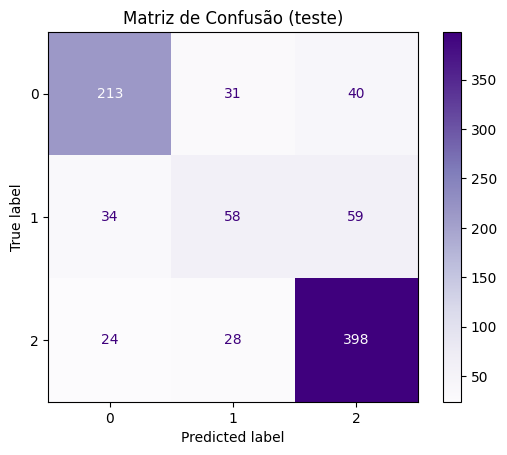

In [277]:
rf_conf_matrix = confusion_matrix(y_test, rf_test_predictions)

matrix_conf = ConfusionMatrixDisplay(rf_conf_matrix)
matrix_conf.plot(cmap='Purples')  

plt.title('Matriz de Confusão (teste)')
plt.show()

In [278]:
rf_classification_report = classification_report(y_test, rf_test_predictions)
print(f'Relatório de Classificação para a SVM (teste):\n\n{rf_classification_report}')

Relatório de Classificação para a SVM (teste):

              precision    recall  f1-score   support

           0       0.79      0.75      0.77       284
           1       0.50      0.38      0.43       151
           2       0.80      0.88      0.84       450

    accuracy                           0.76       885
   macro avg       0.69      0.67      0.68       885
weighted avg       0.74      0.76      0.75       885



## 5. Modelo Não Supervisionado

### 5.1 Pré-processamento

Selecionamos as duas variáveis com maior correlação com o "Target" para testar a clusterização pelo modelo K-means. Aplicamos o StanderScaler para normalização dos dados.

In [279]:
df_nsuperv = df_final[['Curricular units 2nd sem (approved)','Curricular units 2nd sem (grade)']].copy()
df_nsuperv.head()

,Curricular units 2nd sem (approved),Curricular units 2nd sem (grade)
0,0,0.000000
1,6,13.666667
2,0,0.000000
3,5,12.400000
4,6,13.000000


In [280]:
pipeline = Pipeline([
    ('scale', StandardScaler())
])

X_norm = pipeline.fit_transform(df_nsuperv)

X_norm

array([[-1.47152688, -1.96348862],
       [ 0.51890369,  0.65956171],
       [-1.47152688, -1.96348862],
       ...,
       [-1.13978845,  0.62757329],
       [ 0.18716526,  0.33967752],
       [ 0.51890369,  0.53160803]])

### 5.1 K-means

#### Determinando o hiperparâmetro k

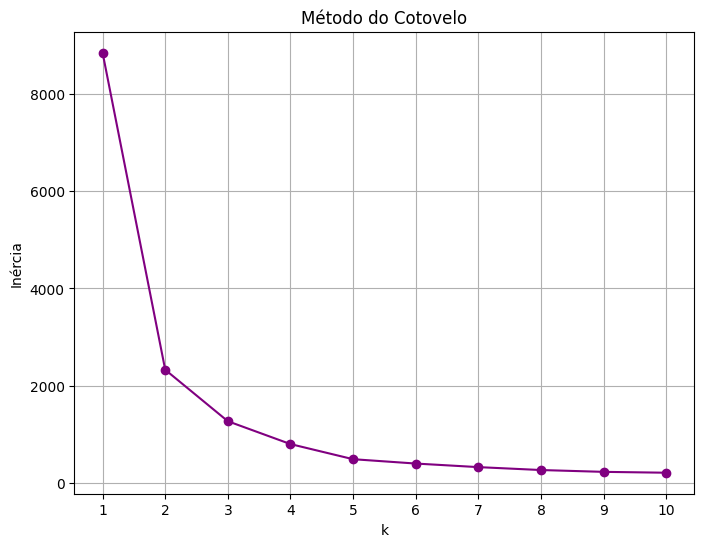

In [281]:
wcss = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_norm)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o', color='purple')
plt.xlabel('k')
plt.ylabel('Inércia')
plt.title('Método do Cotovelo')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

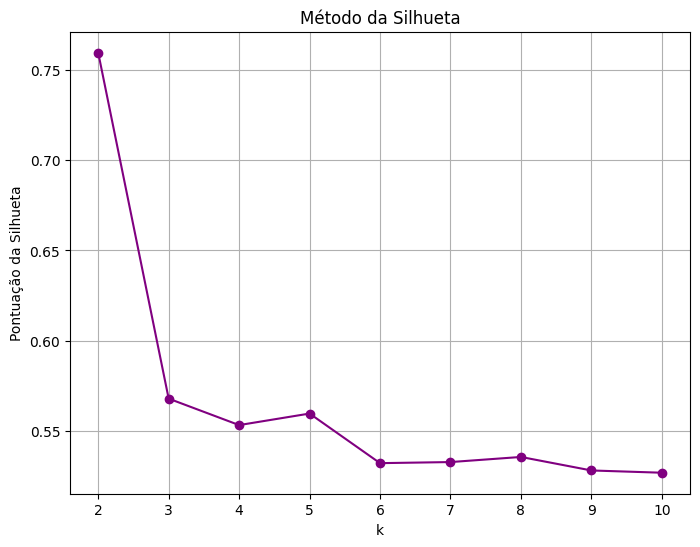

In [282]:
pont_silhueta = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_norm)
    labels = kmeans.labels_
    score = silhouette_score(X_norm, labels)
    pont_silhueta.append(score)

# Plotar a pontuação da silhueta em função de k
plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), pont_silhueta, marker='o', color='purple')
plt.xlabel('k')
plt.ylabel('Pontuação da Silhueta')
plt.title('Método da Silhueta')
plt.xticks(range(2, 11))
plt.grid(True)
plt.show()

Tanto o método do cotovelo quanto da silhueta apontaram para melhor performance com um k de 2.

#### Aplicando o Algoritmo

In [283]:
kmeans = KMeans(n_clusters=2, random_state=42, max_iter=1000)
kmeans.fit(X_norm)
labels = kmeans.labels_

df_nsuperv['Cluster'] = labels
df_nsuperv.head()

,Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Cluster
0,0,0.000000,0
1,6,13.666667,1
2,0,0.000000,0
3,5,12.400000,1
4,6,13.000000,1


In [284]:
print(f'Contagem de amostras em cada cluster:\n\n{df_nsuperv['Cluster'].value_counts()}')

Contagem de amostras em cada cluster:

Cluster
1    3554
0     870
Name: count, dtype: int64


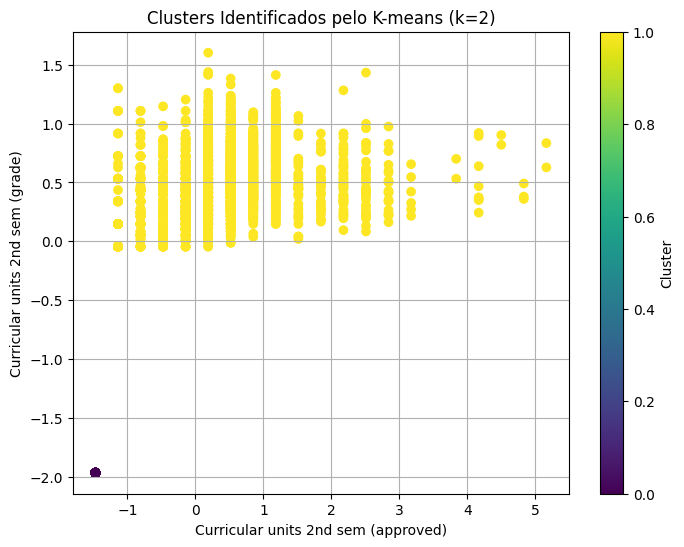

In [285]:
plt.figure(figsize=(8, 6))
plt.scatter(X_norm[:, 0], X_norm[:, 1], c=labels, cmap='viridis')
plt.title('Clusters Identificados pelo K-means (k=2)')
plt.xlabel('Curricular units 2nd sem (approved)')
plt.ylabel('Curricular units 2nd sem (grade)')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

O resultado da clusterizão apresentado pelo gráfico de dispersão não demonstra informações conclusivas. Possivelmente, são necessários ajustes na seleção de variáveis e no pré-processamento dos dados para melhor performance do modelo.

## 6. Conclusões

Durante a análise exploratória dos dados, foi observado que as variáveis com maior índice de correlação com a permanência ou desistência de um estudante de curso superior são, em ordem decrescente de correlação:

| Variável                    | índice de Correlação |
|---------------------------|--------------|
|Curricular units 2nd sem (approved)| 0.624157|
|Curricular units 2nd sem (grade)| 0.566827|
|Curricular units 1st sem (approved)| 0.529123|
|Curricular units 1st sem (grade)| 0.485207|
|Tuition fees up to date| 0.409827|
|Scholarship holder| 0.297595|
|Age at enrollment| -0.243438|
|Debtor| -0.240999|
|Gender| -0.229270|
|Application mode| -0.212025|
|Curricular units 2nd sem (enrolled)| 0.175847|
|Curricular units 1st sem (enrolled)| 0.155974|
|Displaced| 0.113986|

Essas correlações indicam que o fator que mais parece influenciar no abandono da formação por parte do aluno é sua performance nas unidades curriculares do curso. Além disso, fatores financeiros, como mensalidades pagas em dia, se o estudante é devedor, se é bolsista, também têm correlação com sua permanência. 

Após removermos informações que poderiam estar redundantes (unidades curriculares referentes ao primeiro e segundo semestre), submetemos as demais variáveis para treinamento de modelos de aprendizado supervisionado, buscando prever se o aluno é desistênte, matriculado ou formado.

In [291]:
metrics_sup_comp = pd.DataFrame({
    'Accuracy': [round(svm_test_accuracy, 2), round(rf_test_accuracy, 2)],
    'Precision': [round(svm_test_precision, 2), round(rf_test_precision, 2)],
    'Recall': [round(svm_test_recall, 2), round(rf_test_recall, 2)],
    'F1': [round(svm_test_f1, 2), round(rf_test_f1, 2)]},
    index=['SVM', 'Random Forest (Ensemble)'])

metrics_sup_comp

,Accuracy,Precision,Recall,F1
SVM,0.75,0.75,0.75,0.74
Random Forest (Ensemble),0.76,0.74,0.76,0.75


As peformances, medidas em métricas de avaliação, de ambos modelos foram bastante próximas, sendo no geral um pouco melhores para o modelo de Random Forest. Vale considerar, entretanto, que o algoritmo de Random Forest indicou possível overfitting de dados, devido a valores elevados das métricas para a fase de treino.

O modelo de aprendizado não-supervisionado K-means, que foi usado somente para as duas variáveis com maior índice de correlação (Curricular units 2nd sem (approved) e Curricular units 2nd sem (grade)), não apresentou resultados conclusivos ao observar o gráfico de dispersão.